In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfX = pd.read_csv("Training Data/Logistic_X_Train.csv")
dfY = pd.read_csv("Training Data/Logistic_Y_Train.csv")


In [22]:
dfX.head(5)
#dfX.values[:500,:].shape

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [6]:
dfY.head(5)

,label
0,1
1,1
2,1
3,0
4,0


In [16]:
X_train = np.array(dfX.values[:-500,:])
Y_train = np.array(dfY.values[:-500,:])

print(X_train.shape)
print(Y_train.shape)

(2500, 3)
(2500, 1)


In [85]:
X_test = np.array(dfX.values[-500:,:])
Y_test = np.array(dfY.values[-500:,:])

print(X_test.shape)
print(Y_test.shape)
print(Y_train)

(500, 3)
(500, 1)
[[1]
 [1]
 [1]
 ..., 
 [1]
 [1]
 [1]]


In [38]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [39]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [109]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx))
        
    return total_error/m

In [110]:
def get_grad(Y,X,theta):
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - hx)*x
        
    return grad/m

In [146]:
def grad_descent(X,Y,steps,learning_rate = 0.5):
    theta = np.zeros((X.shape[1],1))
   
    
    error_list = []
    for i in range(steps):
        theta = theta +learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
        
    return theta,error_list

In [216]:
theta , error_list = grad_descent(X_train,Y_train,250)

In [217]:
errorL = np.array(error_list) 
errorL.shape

(250, 1)

In [218]:
theta

array([[-1.75053047],
       [ 1.03332159],
       [-3.09581791]])

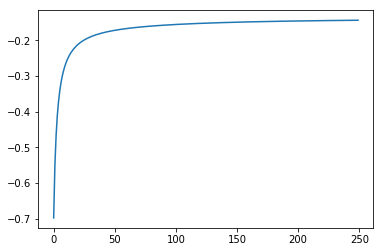

In [219]:
plt.plot(error_list)
plt.show()

In [220]:
def predict(X_test,theta):
    prob = hypothesis(X_test,theta)
    if(prob<=0.5):
        return 0
    else:
        return 1

In [259]:
Y_pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [260]:
Y_pred = Y_pred.reshape((-1,1))
print(Y_pred.shape)


(500, 1)


In [261]:
np.sum((Y_pred==Y_test))

491

In [244]:
XT = pd.read_csv("Test Cases/Logistic_X_Test.csv")
Xtest = np.array(XT.values)

sam = pd.read_csv("Test Cases/SampleOutput.csv")


In [245]:
XT.head(5)
print(XT.shape)


(1000, 3)


In [227]:
sam.head(5)

,label
0,1
1,1
2,1
3,0
4,0


In [246]:
YT = np.array([predict(Xtest[i],theta) for i in range(Xtest.shape[0])])

In [249]:
YT = YT.reshape(-1,1)

In [251]:
result = pd.DataFrame(YT,columns = ["label"])

In [254]:
result.to_csv("Test Cases/Y_pred.csv",index=False)

In [255]:
pd.read_csv("Test Cases/Y_pred.csv")

,label
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,0


# final

In [256]:
X_train = np.array(dfX.values[:,:])
Y_train = np.array(dfY.values[:,:])

print(X_train.shape)
print(Y_train.shape)

(3000, 3)
(3000, 1)


In [257]:
theta , error_list = grad_descent(X_train,Y_train,250)

In [258]:
theta

array([[-1.74008749],
       [ 1.02528581],
       [-3.09219494]])

In [262]:
YT = np.array([predict(Xtest[i],theta) for i in range(Xtest.shape[0])])

In [263]:
YT = YT.reshape(-1,1)

In [264]:
result = pd.DataFrame(YT,columns = ["label"])

In [265]:
result.to_csv("Test Cases/Y_pred.csv",index=False)